## Chi tỉ lệ 70 20 10

In [1]:
import os
import random
import shutil

# Đặt seed cho việc phân chia ngẫu nhiên (để kết quả nhất quán nếu cần)
random.seed(42)

# Đường dẫn dataset đã merge
merged_images_dir = "/hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/merged_dataset_student_scb/images"
merged_labels_dir = "/hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/merged_dataset_student_scb/labels"

# Đường dẫn thư mục output cho dataset đã chia
dest_dataset_dir = "/hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/split_dataset_student_scb"

# Các đường dẫn cho từng tập
train_images_dir = os.path.join(dest_dataset_dir, "train", "images")
train_labels_dir = os.path.join(dest_dataset_dir, "train", "labels")
val_images_dir   = os.path.join(dest_dataset_dir, "valid", "images")
val_labels_dir   = os.path.join(dest_dataset_dir, "valid", "labels")
test_images_dir  = os.path.join(dest_dataset_dir, "test", "images")
test_labels_dir  = os.path.join(dest_dataset_dir, "test", "labels")

# Tạo các thư mục nếu chưa tồn tại
for folder in [train_images_dir, train_labels_dir, val_images_dir, val_labels_dir, test_images_dir, test_labels_dir]:
    os.makedirs(folder, exist_ok=True)

# Các định dạng ảnh hợp lệ
valid_extensions = [".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff"]

# Lấy danh sách tất cả file ảnh trong merged_images_dir
all_images = [f for f in os.listdir(merged_images_dir) if os.path.splitext(f)[1].lower() in valid_extensions]

# Xáo trộn danh sách ảnh
random.shuffle(all_images)

# Phân chia theo tỉ lệ: 70% train, 20% valid, 10% test
total = len(all_images)
train_count = int(total * 0.7)
val_count = int(total * 0.2)
test_count = total - train_count - val_count  # đảm bảo tổng bằng total

print("Tổng số ảnh:", total)
print("Train:", train_count, "Valid:", val_count, "Test:", test_count)

# Lấy danh sách ảnh cho từng tập
train_images = all_images[:train_count]
val_images   = all_images[train_count:train_count+val_count]
test_images  = all_images[train_count+val_count:]

def copy_files(image_list, src_images_dir, src_labels_dir, dst_images_dir, dst_labels_dir):
    """
    Copy ảnh và file label tương ứng (nếu có) từ folder nguồn sang folder đích.
    """
    for image_file in image_list:
        # Copy ảnh
        src_img = os.path.join(src_images_dir, image_file)
        dst_img = os.path.join(dst_images_dir, image_file)
        shutil.copy(src_img, dst_img)
        
        # Tìm file label tương ứng dựa vào tên file (giả sử định dạng .txt)
        base_name = os.path.splitext(image_file)[0]
        label_file = base_name + ".txt"
        src_label = os.path.join(src_labels_dir, label_file)
        if os.path.exists(src_label):
            dst_label = os.path.join(dst_labels_dir, label_file)
            shutil.copy(src_label, dst_label)

# Copy files cho mỗi tập
copy_files(train_images, merged_images_dir, merged_labels_dir, train_images_dir, train_labels_dir)
copy_files(val_images, merged_images_dir, merged_labels_dir, val_images_dir, val_labels_dir)
copy_files(test_images, merged_images_dir, merged_labels_dir, test_images_dir, test_labels_dir)

print("Phân chia dataset thành công!")


Tổng số ảnh: 10405
Train: 7283 Valid: 2081 Test: 1041
Phân chia dataset thành công!


## Thống kê

--- Train Statistics ---
Total images: 7283
Duplicate images: 0
Total labels: 2452
Duplicate labels: 0
Images without label: 4831
Labels without image: 0
Tổng mismatch: 4831
-----------------------------

--- Valid Statistics ---
Total images: 2081
Duplicate images: 0
Total labels: 720
Duplicate labels: 0
Images without label: 1361
Labels without image: 0
Tổng mismatch: 1361
-----------------------------

--- Test Statistics ---
Total images: 1041
Duplicate images: 0
Total labels: 369
Duplicate labels: 0
Images without label: 672
Labels without image: 0
Tổng mismatch: 672
-----------------------------



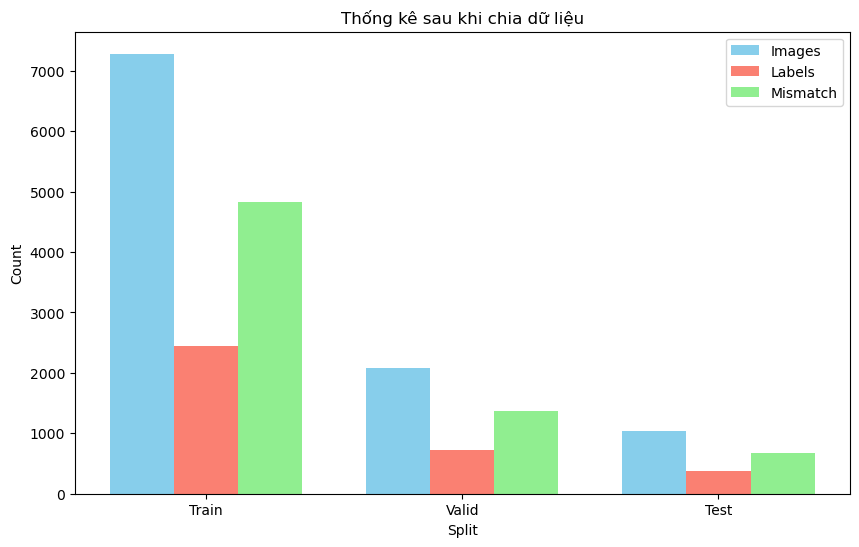

In [2]:
import os
import random
import shutil
import matplotlib.pyplot as plt

# --------------------------
# Các hàm hỗ trợ thống kê
# --------------------------

def get_files_stats(directory, valid_exts):
    """
    Lấy danh sách các file trong folder 'directory' có phần mở rộng trong valid_exts.
    Trả về một dict gồm:
      - total: tổng số file
      - files: danh sách tên file
      - duplicates: danh sách tên file trùng (nếu có)
    """
    files = [f for f in os.listdir(directory) if os.path.splitext(f)[1].lower() in valid_exts]
    total = len(files)
    freq = {}
    duplicates = []
    for f in files:
        freq[f] = freq.get(f, 0) + 1
        if freq[f] > 1 and f not in duplicates:
            duplicates.append(f)
    return {"total": total, "files": files, "duplicates": duplicates}

def check_match(images_dir, labels_dir, image_exts, label_ext=".txt"):
    """
    Kiểm tra sự không khớp giữa ảnh và label.
    Giả sử tên file (không phần mở rộng) của ảnh và label phải khớp.
    Trả về một dict với:
      - images_without_labels: danh sách ảnh không có file label tương ứng
      - labels_without_images: danh sách label không có file ảnh tương ứng
    """
    image_files = [os.path.splitext(f)[0] for f in os.listdir(images_dir) 
                   if os.path.splitext(f)[1].lower() in image_exts]
    label_files = [os.path.splitext(f)[0] for f in os.listdir(labels_dir) 
                   if f.endswith(label_ext)]
    images_set = set(image_files)
    labels_set = set(label_files)
    images_without_labels = list(images_set - labels_set)
    labels_without_images = list(labels_set - images_set)
    return {"images_without_labels": images_without_labels, 
            "labels_without_images": labels_without_images}

def visualize_split_stats(split_name, image_stats, label_stats, mismatch_stats):
    """
    In ra thống kê cho một split (train, valid, test)
    """
    print(f"--- {split_name} Statistics ---")
    print("Total images:", image_stats["total"])
    print("Duplicate images:", len(image_stats["duplicates"]))
    print("Total labels:", label_stats["total"])
    print("Duplicate labels:", len(label_stats["duplicates"]))
    images_mismatch = len(mismatch_stats["images_without_labels"])
    labels_mismatch = len(mismatch_stats["labels_without_images"])
    print("Images without label:", images_mismatch)
    print("Labels without image:", labels_mismatch)
    print("Tổng mismatch:", images_mismatch + labels_mismatch)
    print("-----------------------------\n")

def visualize_bar_chart(stats):
    """
    Vẽ biểu đồ cột hiển thị thống kê tổng hợp cho từng split.
    stats: dict với key là tên split (Train, Valid, Test) và value là dict gồm:
         - images: tổng số ảnh
         - labels: tổng số label
         - mismatch: tổng số file không khớp
    """
    splits = list(stats.keys())
    images_counts = [stats[split]["images"] for split in splits]
    labels_counts = [stats[split]["labels"] for split in splits]
    mismatch_counts = [stats[split]["mismatch"] for split in splits]
    
    x = range(len(splits))
    width = 0.25
    plt.figure(figsize=(10, 6))
    plt.bar([i - width for i in x], images_counts, width=width, label="Images", color="skyblue")
    plt.bar(x, labels_counts, width=width, label="Labels", color="salmon")
    plt.bar([i + width for i in x], mismatch_counts, width=width, label="Mismatch", color="lightgreen")
    plt.xticks(x, splits)
    plt.xlabel("Split")
    plt.ylabel("Count")
    plt.title("Thống kê sau khi chia dữ liệu")
    plt.legend()
    plt.show()

# --------------------------
# Đường dẫn cấu trúc sau khi chia dữ liệu
# --------------------------
dest_dataset_dir = "/hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/split_dataset_student_scb"

train_images_dir = os.path.join(dest_dataset_dir, "train", "images")
train_labels_dir = os.path.join(dest_dataset_dir, "train", "labels")
val_images_dir   = os.path.join(dest_dataset_dir, "valid", "images")
val_labels_dir   = os.path.join(dest_dataset_dir, "valid", "labels")
test_images_dir  = os.path.join(dest_dataset_dir, "test", "images")
test_labels_dir  = os.path.join(dest_dataset_dir, "test", "labels")

# Định nghĩa các định dạng ảnh hợp lệ và label
valid_img_exts = [".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff"]
valid_label_exts = [".txt"]

# --------------------------
# Lấy thống kê cho từng split
# --------------------------
train_image_stats = get_files_stats(train_images_dir, valid_img_exts)
train_label_stats = get_files_stats(train_labels_dir, valid_label_exts)
train_mismatch_stats = check_match(train_images_dir, train_labels_dir, valid_img_exts)

val_image_stats = get_files_stats(val_images_dir, valid_img_exts)
val_label_stats = get_files_stats(val_labels_dir, valid_label_exts)
val_mismatch_stats = check_match(val_images_dir, val_labels_dir, valid_img_exts)

test_image_stats = get_files_stats(test_images_dir, valid_img_exts)
test_label_stats = get_files_stats(test_labels_dir, valid_label_exts)
test_mismatch_stats = check_match(test_images_dir, test_labels_dir, valid_img_exts)

# --------------------------
# In ra thống kê từng split
# --------------------------
visualize_split_stats("Train", train_image_stats, train_label_stats, train_mismatch_stats)
visualize_split_stats("Valid", val_image_stats, val_label_stats, val_mismatch_stats)
visualize_split_stats("Test", test_image_stats, test_label_stats, test_mismatch_stats)

# --------------------------
# Tổng hợp thống kê cho bar chart
# --------------------------
aggregate_stats = {
    "Train": {
         "images": train_image_stats["total"],
         "labels": train_label_stats["total"],
         "mismatch": len(train_mismatch_stats["images_without_labels"]) + len(train_mismatch_stats["labels_without_images"])
    },
    "Valid": {
         "images": val_image_stats["total"],
         "labels": val_label_stats["total"],
         "mismatch": len(val_mismatch_stats["images_without_labels"]) + len(val_mismatch_stats["labels_without_images"])
    },
    "Test": {
         "images": test_image_stats["total"],
         "labels": test_label_stats["total"],
         "mismatch": len(test_mismatch_stats["images_without_labels"]) + len(test_mismatch_stats["labels_without_images"])
    }
}

# --------------------------
# Visualize tổng hợp bằng biểu đồ
# --------------------------
visualize_bar_chart(aggregate_stats)
